# Projeto Final: Análise dataset Cars
<hr>

#### Respondendo a perguntas de negócio com base na exploração e análise do dataset cars <br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('cars.csv')

#### Iniciando exploração do dataset

In [3]:
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [4]:
df.describe()

,mpg,cylinders,hp,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,106.360153,15.547893,1976.819923
std,7.823570,1.733310,40.499959,2.910625,3.637696
min,10.000000,3.000000,46.000000,8.000000,1971.000000
25%,16.900000,4.000000,75.000000,14.000000,1974.000000
50%,22.000000,6.000000,95.000000,16.000000,1977.000000
75%,28.800000,8.000000,138.000000,17.000000,1980.000000
max,46.600000,8.000000,230.000000,25.000000,1983.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [6]:
df.shape

(261, 8)

> #### Respondendo às perguntas

### Pergunta 1:
Após a utilização da biblioteca pandas para a leitura dos dados sobre os valores lidos, é CORRETO afirmar que:

In [7]:
df.isna().sum()

,0
mpg,0
cylinders,0
cubicinches,0
hp,0
weightlbs,0
time-to-60,0
year,0
brand,0


Não foram encontrados valores nulos após a leitura dos dados.

### Pergunta 2:
Realize a transformação das colunas “cubicinches” e “weightlbs” do tipo “string” para o tipo numérico utilizando o pd.to_numeric(), utilizando o parâmetro  errors='coerce'. Após essa transformação, é CORRETO afirmar:

In [8]:
df['cubicinches'] = pd.to_numeric(df['cubicinches'], errors='coerce')
df['weightlbs'] = pd.to_numeric(df['weightlbs'], errors='coerce')
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350.0,165,4209.0,12,1972,US.
1,31.9,4,89.0,71,1925.0,14,1980,Europe.
2,17.0,8,302.0,140,3449.0,11,1971,US.
3,15.0,8,400.0,150,3761.0,10,1971,US.
4,30.5,4,98.0,63,2051.0,17,1978,US.


In [9]:
df.isna().sum()

,0
mpg,0
cylinders,0
cubicinches,2
hp,0
weightlbs,3
time-to-60,0
year,0
brand,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  259 non-null    float64
 3   hp           261 non-null    int64  
 4   weightlbs    258 non-null    float64
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 16.4+ KB


Essa transformação adiciona valores nulos ao nosso dataset.


### Pergunta 3:
Indique quais eram os índices dos valores presentes no dataset que “forçaram” o pandas a compreender a variável “cubicinches” como string.

In [11]:
df[df['cubicinches'].isnull()]

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
40,16.0,6,NaN,105,3897.0,19,1976,US.
180,19.8,6,NaN,85,2990.0,18,1980,US.


### Pergunta 4:
Após a transformação das variáveis “string” para os valores numéricos, quantos valores nulos (células no dataframe) passaram a existir no dataset?

In [12]:
df.isna().sum()

,0
mpg,0
cylinders,0
cubicinches,2
hp,0
weightlbs,3
time-to-60,0
year,0
brand,0


### Pergunta 5:
Substitua os valores nulos introduzidos no dataset após a transformação pelo valor médio das colunas. Qual é o novo valor médio da coluna “weightlbs”?

In [13]:
df.fillna(df[['weightlbs','cubicinches']].mean(), inplace=True)
print(round(df['weightlbs'].mean(),2))

3009.83


### Pergunta 6:
Após substituir os valores nulos pela média das colunas, selecione as colunas ['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60', 'year']. Qual é o valor da mediana para a característica 'mpg'?

In [14]:
df_filter = df.drop('brand', axis=1)
df_filter.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350.0,165,4209.0,12,1972
1,31.9,4,89.0,71,1925.0,14,1980
2,17.0,8,302.0,140,3449.0,11,1971
3,15.0,8,400.0,150,3761.0,10,1971
4,30.5,4,98.0,63,2051.0,17,1978


In [15]:
df_filter['mpg'].median()

22.0

### Pergunta 7:
Qual é a afirmação CORRETA sobre o valor de 14,00 para a variável “time-to-60”?

In [16]:
df_filter['time-to-60'].describe()

,time-to-60
count,261.000000
mean,15.547893
std,2.910625
min,8.000000
25%,14.000000
50%,16.000000
75%,17.000000
max,25.000000


75% dos dados são maiores que o valor de 14,00.

### Pergunta 8:
Aplicando o PCA, conforme a definição acima, qual é o valor da variância explicada pela primeira componente principal?

In [17]:
# preparando o dataset conforme enunciado
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_filter)

scaled_data

array([[-1.17112732,  1.39305285,  1.37239295, ...,  1.41499703,
        -1.22128734, -1.32753906],
       [ 1.12122635, -0.91910482, -1.03028992, ..., -1.28008557,
        -0.53282946,  0.8758803 ],
       [-0.78693397,  1.39305285,  0.93052024, ...,  0.51820947,
        -1.56551627, -1.60296648],
       ...,
       [-0.14661172,  0.23697401,  0.28612253, ..., -0.20630047,
        -0.18860053,  1.70216257],
       [-0.65886952,  0.23697401,  0.28612253, ...,  0.32823211,
         0.15562841, -1.32753906],
       [-0.14661172,  0.23697401,  0.4518248 , ...,  0.40493105,
        -0.18860053,  0.04959804]])

In [18]:
scaler = StandardScaler()
hp = scaler.fit_transform((df_filter['cylinders'].values).reshape(-1, 1))
hp.max()

1.393052850675895

In [19]:
# PCA
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(scaled_data)

([<matplotlib.axis.XTick at 0x7a030fc46710>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6')])

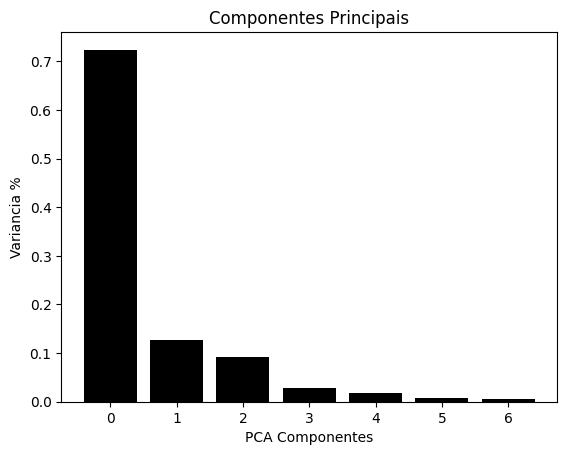

In [20]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA Componentes')
plt.ylabel('Variancia %')
plt.title('Componentes Principais')
plt.xticks(features)

In [21]:
print(round(pca.explained_variance_ratio_[1],2))

0.13


### Pergunta 9:
Utilize os três primeiros componentes principais para construir o K-means com um número de três clusters. Sobre os clusters, é INCORRETO afirmar que:

In [22]:
df_pca = pd.DataFrame(principalComponents)
df_pca.head()

,0,1,2,3,4,5,6
0,3.485219,-0.526326,-0.139738,0.258792,0.086902,0.179206,-0.079078
1,-2.176912,0.285424,-1.304613,-0.100465,-0.289698,0.041147,0.013127
2,2.684973,-1.046946,-0.732156,0.498227,-0.535168,0.075745,-0.159956
3,3.534648,-0.847619,-0.801334,0.506630,-0.435696,0.144237,0.483162
4,-2.299222,-0.194808,-0.221704,0.079650,-0.175655,-0.015566,0.069958


In [23]:
X = df[['cylinders' ,'cubicinches' ,'hp' ,'weightlbs' ,'time-to-60']]
df['class'] = ''
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Padronizar dados de treinamento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# PCA
pca = PCA(n_components=3)
principalComponents_train = pca.fit_transform(X_train_scaled)

# K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(principalComponents_train)

# rótulos dos clusters
rotulos_clusters = kmeans.labels_

# centroides dos clusters
centroides = kmeans.cluster_centers_

# elementos em cada cluster
quantidade_elementos = np.bincount(rotulos_clusters)

print("Quantidade de elementos em cada cluster:", quantidade_elementos)
print("\nCentroides dos clusters:\n", centroides)


Quantidade de elementos em cada cluster: [56 43 83]

Centroides dos clusters:
 [[ 2.71534507 -0.02314477  0.03073617]
 [-0.03211298  0.53766282  0.16348109]
 [-1.8154032  -0.26293246 -0.10543268]]


Todos os clusters possuem a mesma quantidade de elementos.

### Pergunta 10:
Após todo o processamento realizado nos itens anteriores, crie uma coluna que contenha a variável de eficiência do veículo. Veículos que percorrem mais de 25 milhas com um galão (“mpg”>25) devem ser considerados eficientes. Utilize as colunas ['cylinders' ,'cubicinches'            ,'hp' ,'weightlbs','time-to-60'] como entradas e como saída a coluna de eficiência criada.



Utilizando a árvore de decisão como mostrado, qual é a acurácia do modelo?

In [24]:
# criando coluna
df['eficience'] = df['mpg'] > 25

X = df[['cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60']]
y = df['eficience']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

arvore = DecisionTreeClassifier(random_state=42)
arvore.fit(X_train, y_train)

y_pred = arvore.predict(X_test)

acuracia = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", round(acuracia,2))

Acurácia do modelo: 0.87


### Pergunta 11:
Após normalizado, utilizando a função StandardScaler(), qual é o maior valor para a variável “hp”?

In [25]:
hp = df[['hp']]

scaler = StandardScaler()
hp_scaled = scaler.fit_transform(hp)
print(round(hp_scaled.max(),2))

3.06
